# Projeto Titanic

##### P1: De qual sexo houve mais sobreviventes?
##### P2: A classe do sexo prevalente influenciou na sobrevivência? 
##### P3: Qual a classe em que prevaleceu a sobrevivência?
##### P4: Qual a média de idade dos passageiros?
##### P5: Qual a média de idade dos sobreviventes?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_titanic = pd.read_csv('titanic-data-6.csv')


In [2]:
df_titanic[0:200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
print("O numero de amostras do conjunto avaliado é {0}".format(
len(df_titanic)))

O numero de amostras do conjunto avaliado é 891


In [4]:
print("O numero de Colunas do conjunto avaliado é {0}".format(
len(df_titanic.columns)))

O numero de Colunas do conjunto avaliado é 12


In [5]:
print("A quantidade de linhas duplicadas no conjunto é {0}".format(
df_titanic.duplicated().sum()))

A quantidade de linhas duplicadas no conjunto é 0


In [6]:
print("A quantidade de linhas sem dados no conjunto é {0}".format(
df_titanic.isnull().sum()))

A quantidade de linhas sem dados no conjunto é PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
print("O tipo de dados das columas da amostra é {0}".format(
    df_titanic.dtypes))

O tipo de dados das columas da amostra é PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### Descartando Colunas Irrelevantes

In [8]:
# excluindo colunas que tenham linhas com valores nulos, e que não seram relevantes no projeto
df_titanic.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

# Conferindo exclusão das colunas
df_titanic.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.25


In [9]:
# Renomeando colunas para minusculo
df_titanic.rename(columns=lambda x: x.strip().lower(), inplace=True)

# confirmando as mudanças
df_titanic.head(1) 

,passengerid,survived,pclass,sex,age,sibsp,parch,fare
0,1,0,3,male,22.0,1,0,7.25


### Q1: De qual sexo houve mais sobreviventes?

In [10]:
#obtendo todos os passageiros de sexo feminino
df_female = df_titanic.query('sex == "female"');

In [11]:
#obtendo todos os passageiros de sexo masculino
df_male = df_titanic.query('sex == "male"');

In [12]:
#Obtendo todos os sobreviventes agrupados por sexo
df_male_survivor = df_male.query('survived == 1')
df_female_survivor = df_female.query('survived == 1')
qdt_male_survivor = len(df_male_survivor)
qdt_female_survivor = len(df_female_survivor)

print("Houve {0} sobreviventes do sexo masculino e {1} sobreviventes do sexo feminino".format(qdt_male_survivor, qdt_female_survivor))

Houve 109 sobreviventes do sexo masculino e 233 sobreviventes do sexo feminino


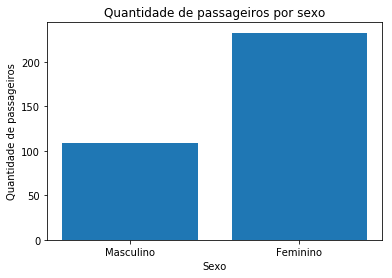

In [13]:
# Grafico de barras de sobreviventes por sexo
locations = [1, 2]
heights = [len(df_male_survivor),len(df_female_survivor)]
labels = ['Masculino', 'Feminino']
plt.bar(locations, heights, tick_label=labels)
plt.title('Quantidade de passageiros por sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade de passageiros');

In [14]:
#calculando o percentil de sobreviventes do sexo masculino 
df_male_survivor_percentil = len(df_male_survivor) / len(df_male)*100 
df_male_survivor_percentil

18.890814558058924

In [15]:
#calculando o percentil de sobreviventes do sexo Feminono
df_female_survivor_percentil = len(df_female_survivor) / len(df_female)*100 
df_female_survivor_percentil

74.20382165605095

In [16]:
print("A proporção de sobreviência foi de \n{0}% do sexo masculino sobreviveram e \n{1}% do sexo feminino sobreviveram".format(round(df_male_survivor_percentil, 2), round(df_female_survivor_percentil, 2)))

A proporção de sobreviência foi de 
18.89% do sexo masculino sobreviveram e 
74.2% do sexo feminino sobreviveram


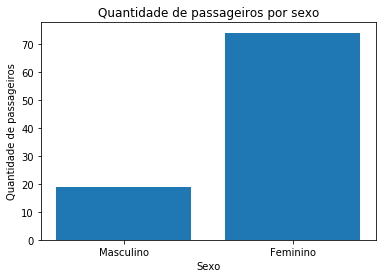

In [17]:
# Grafico de barras de sobreviventes por sexo
locations = [1, 2]
heights = [df_male_survivor_percentil,df_female_survivor_percentil]
labels = ['Masculino', 'Feminino']
plt.bar(locations, heights, tick_label=labels)
plt.title('Quantidade de passageiros por sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade de passageiros');

### Q2: A classe do sexo prevalente influenciou na sobrevivência? 

In [18]:
#obtendo os valores unicos por classe
df_female_per_class = df_female.groupby(['pclass']).count()['survived']
df_female_per_class

pclass
1     94
2     76
3    144
Name: survived, dtype: int64

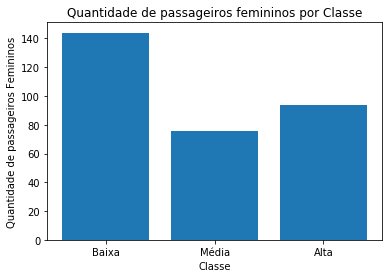

In [19]:
#criando grafico de passageiros femininos por classe
locations = [1, 2, 3]
heights = [df_female_per_class[3],df_female_per_class[2], df_female_per_class[1]]
labels = ['Baixa', 'Média', 'Alta']
plt.bar(locations, heights, tick_label=labels)
plt.title('Quantidade de passageiros femininos por Classe')
plt.xlabel('Classe')
plt.ylabel('Quantidade de passageiros Femininos');

In [20]:
#Criando 2 grupos, sendo 0 Dead (Morto) / 1 Survivors (sobreviventes
df_female_dead = df_female.query('survived == "0" ')
df_female_survivors = df_female.query('survived == "1"')

In [21]:
print("Sobreviveram {0} e morreram {1}".format(len(df_female_survivors), len(df_female_dead)))

Sobreviveram 233 e morreram 81


In [22]:
#agrupando os sobreviventes por classe
qdt_female_survivors = df_female_survivors.groupby(['pclass']).count()['survived']

In [23]:
print("Sobreviveram {0} de classe alta, {1} de classe Media, e {2} de classe baixa".format(qdt_female_survivors[1], qdt_female_survivors[2], qdt_female_survivors[3]))

Sobreviveram 91 de classe alta, 70 de classe Media, e 72 de classe baixa


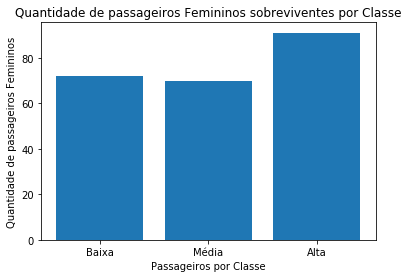

In [24]:
#criando grafico de passageiros femininos que sobreviveram por classe

locations = [1, 2, 3]
heights = [qdt_female_survivors[3],qdt_female_survivors[2], qdt_female_survivors[1]]
labels = ['Baixa', 'Média', 'Alta']
plt.bar(locations, heights, tick_label=labels)
plt.title('Quantidade de passageiros Femininos sobreviventes por Classe')
plt.xlabel('Passageiros por Classe')
plt.ylabel('Quantidade de passageiros Femininos');

#### Criando os percentis de mulheres sobreviventes de acordo com a classe dividi-se o total de sobreviventes por classe, pela quantidade total de homens que embarcou por classe assim chegamos a porcentagem de sobreviventes por classe

In [25]:
high_class_percent_alive = qdt_female_survivors[1] / df_female_per_class[1]
middle_class_percent_alive = qdt_female_survivors[2] / df_female_per_class[2]
low_class_percent_alive = qdt_female_survivors[3] / df_female_per_class[3]

In [26]:
print("A porcentagem aproximada de mulheres Sobreviventes por classe foi de \n{0}% para classe alta \n{1}% para classe média \n{2}% para classe baixa"
      .format(round(high_class_percent_alive, 2)*100, round(middle_class_percent_alive, 2)*100, round(low_class_percent_alive, 2)*100))

A porcentagem aproximada de mulheres Sobreviventes por classe foi de 
97.0% para classe alta 
92.0% para classe média 
50.0% para classe baixa


# Tirando a contra prova vamos fazer a percentagem de mortos por classe

In [27]:
#agrupando os sobreviventes por classe
qdt_female_dead = df_female_dead.groupby(['pclass']).count()['survived']

In [28]:
print("Morreram {0} de classe alta, {1} de classe Media, e {2} de classe baixa".format(qdt_female_dead[1], qdt_female_dead[2], qdt_female_dead[3]))

Morreram 3 de classe alta, 6 de classe Media, e 72 de classe baixa


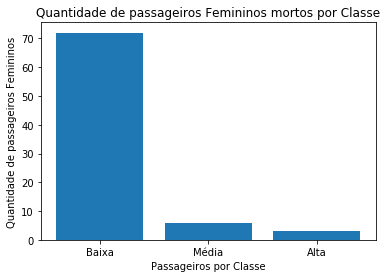

In [29]:
#criando grafico de passageiros que sobreviveram por classe

locations = [1, 2, 3]
heights = [qdt_female_dead[3], qdt_female_dead[2], qdt_female_dead[1]]
labels = ['Baixa', 'Média', 'Alta']
plt.bar(locations, heights, tick_label=labels)
plt.title('Quantidade de passageiros Femininos mortos por Classe')
plt.xlabel('Passageiros por Classe')
plt.ylabel('Quantidade de passageiros Femininos');

#### Criando os percentis de mulheres mortas de acordo com a classe,  dividi-se o total de mortas por classe, pela quantidade total de mulheres por classe que embarcaram assim chegamos a porcentagem de mortas por classe

In [30]:
high_class_percent_dead = qdt_female_dead[1] / df_female_per_class[1]
middle_class_percent_dead = qdt_female_dead[2] / df_female_per_class[2]
low_class_percent_dead = qdt_female_dead[3] / df_female_per_class[3]



In [31]:
print("A porcentagem aproximada de mulheres mortas por classe foi de \n{0}% para classe alta \n{1}% para classe média \n{2}% para classe baixa"
      .format(round(high_class_percent_dead, 2)*100, round(middle_class_percent_dead, 2)*100,round(low_class_percent_dead * 100, 2)))

A porcentagem aproximada de mulheres mortas por classe foi de 
3.0% para classe alta 
8.0% para classe média 
50.0% para classe baixa


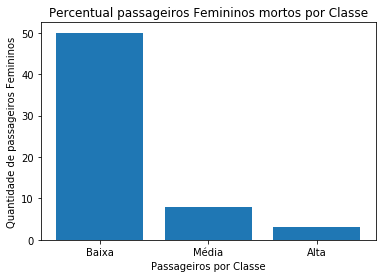

In [32]:
#Grafico de percentis de mulheres mortos por classe
locations = [1, 2, 3]
heights_dead = [round(low_class_percent_dead, 2)*100,round(middle_class_percent_dead, 2)*100, round(high_class_percent_dead, 2)*100]
labels = ['Baixa', 'Média', 'Alta']
plt.bar(locations, heights_dead, tick_label=labels)
plt.title('Percentual passageiros Femininos mortos por Classe')
plt.xlabel('Passageiros por Classe')
plt.ylabel('Quantidade de passageiros Femininos');

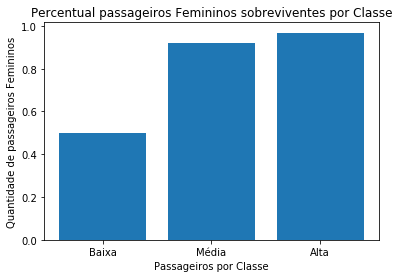

In [33]:
#Grafico de percentis de mulheres sobreviventes por classe

locations = [1, 2, 3]
heights_alive = [low_class_percent_alive,middle_class_percent_alive, high_class_percent_alive]
labels = ['Baixa', 'Média', 'Alta']
plt.bar(locations, heights_alive, tick_label=labels)
plt.title('Percentual passageiros Femininos sobreviventes por Classe')
plt.xlabel('Passageiros por Classe')
plt.ylabel('Quantidade de passageiros Femininos');

#### Baseado nos gráficos acima, considera-se que houve influencia da classe alta no critério de salvamento, em contrapartida observa-se a maior incidência de mortes nas classes média e baixa, e um menor percentual de sovrevivencia nestas duas ultimas classes.

### Q3: Qual a classe em que prevaleceu a sobrevivência?

In [34]:
#contando todos os sobreviventes idenpendente do sexo
df_survivors_all = df_titanic.query("survived == 1")

In [35]:
#agrupando as classes de passageiros
class_per_passenger = df_titanic.groupby(['pclass']).count()['survived']
#Conferindo a agrupagem
class_per_passenger

pclass
1    216
2    184
3    491
Name: survived, dtype: int64

In [36]:
#agrupando as classes de passageiros sobreviventes
class_per_survivor = df_survivors_all.groupby(['pclass']).count()['survived']
#Conferindo a agrupagem
class_per_survivor

pclass
1    136
2     87
3    119
Name: survived, dtype: int64

In [37]:
#extraindo os precentis de sobrevivência por classe
baixa = (class_per_survivor[3] / class_per_passenger[3])*100
media = (class_per_survivor[2] / class_per_passenger[2])*100 
alta = (class_per_survivor[1]/class_per_passenger[1])*100

#### Grafico de percentis de sobreviventes por classe Pega se o total de sobreviventes por classe, e divide-se pelo total de passageiros por classe, afim de obter-se o percentual de sobrevivênvia relativo a cada classe, e assim chegar-se a prevalência da classe sobrevivente

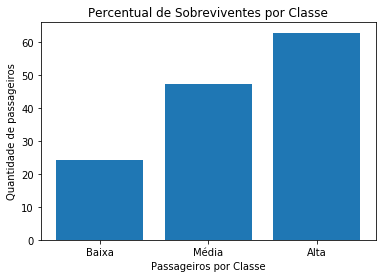

In [38]:
#Gráfico com percentual de sobreviventes por classe

locations = [1, 2, 3]
heights_survivor_per_class = [baixa, media, alta]
labels = ['Baixa', 'Média', 'Alta']
plt.bar(locations, heights_survivor_per_class, tick_label=labels)
plt.title('Percentual de Sobreviventes por Classe')
plt.xlabel('Passageiros por Classe')
plt.ylabel('Quantidade de passageiros');

In [39]:
print("O Percentil de sobreviventes foram de {0}% para classe baixa, {1}% para classe média, e {2}% para classe alta".format(round(baixa, 1), round(media, 1), round(alta, 1)))

O Percentil de sobreviventes foram de 24.2% para classe baixa, 47.3% para classe média, e 63.0% para classe alta


#### Levando em consideração que o grafico acima baseou-se nos percentuais de passageiros sobreviventes por classe, considera-se que a classe média prevaleceu sobre as demais

### Q4: Qual a média de idade dos passageiros?

In [40]:
#conferindo as linhas e colunas do dataframe original
df_titanic.shape

(891, 8)

In [41]:
#verificando se existem valores nulos na coluna age
df_titanic.isnull().sum().any()

True

In [42]:
#Excluindo registro com valores nulos na coluna age
df_age_valid = df_titanic.dropna()

In [43]:
#conferindo as linhas e colunas do dataframe depois de excluidos os dados nulos na coluna age
df_age_valid.shape

(714, 8)

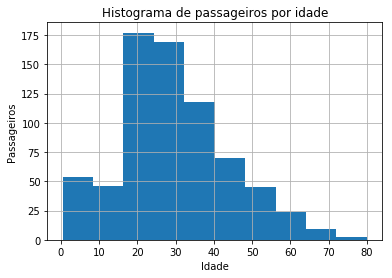

In [44]:
#Grafico de idade dos passageiros
df_age_valid['age'].hist();
plt.xlabel('Idade')
plt.ylabel('Passageiros')
plt.title('Histograma de passageiros por idade')
plt.grid(True)
plt.show()

In [45]:
#validando se ainda existem linhas com valores null
df_age_valid.isnull().sum().any()

False

In [46]:
#Obtendo a media de idade dos passageiros
mean_age = df_age_valid['age'].astype(int).mean()

In [47]:
print("A idade média dos passageiros do titanic era de {0} anos.".format(round(mean_age, 1)))

A idade média dos passageiros do titanic era de 29.7 anos.


###  Q5: Qual a média de idade dos sobreviventes?

In [48]:
#verificando se existem valores nulos na coluna age
df_survivors_all.isnull().sum().any()

True

In [49]:
#excluindo os registros que existam valores nulos na coluna age
df_survivor_age_valid = df_survivors_all.dropna()

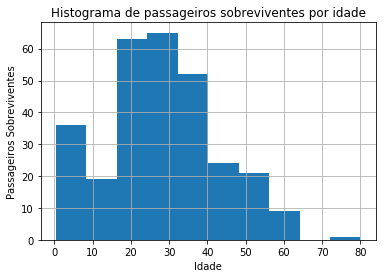

In [50]:
#Grafico de idade dos passageiros sobreviventes
df_survivor_age_valid['age'].hist();
plt.xlabel('Idade')
plt.ylabel('Passageiros Sobreviventes')
plt.title('Histograma de passageiros sobreviventes por idade')
plt.grid(True)
plt.show()

In [51]:
#verificando se ainda existem valores nulos na coluna age
df_survivor_age_valid.isnull().sum().any()

False

In [52]:
#verificando a estrutura de colunas e linhas
df_survivor_age_valid.shape

(290, 8)

In [53]:
#Obtendo a media de idade dos passageiros sobreviventes
mean_age_survivor = df_survivor_age_valid['age'].astype(int).mean()

In [54]:
print("A idade média dos passageiros sobreviventes do titanic foi de {0} anos.".format(round(mean_age_survivor, 1)))

A idade média dos passageiros sobreviventes do titanic foi de 28.3 anos.


#### Observa-se que apesar da pouca diferença, os passageiros mais novos tiveram maiores chances de sobrevicência


# Conclusão

Para realizar essa analise, foi analisado conjunto de dados de passageiros do Titanic dentre mortos e sobreviventes, este conjunto de dados contava com 891 amostras divididas em 12 colunas, das quais foram encontrados valores nulos em 3 delas, sendo “Age”, “Cabin”, e “Embarked”, após verificar que não existiam valores duplicados presentes nos registros, foram removidas 4 colunas das quais não seriam de ajuda para responder as perguntas abaixo, as colunas removidas foram, “Name”, “Ticket”, “Cabin”, “Embarked”, após removidas essas colunas, foram renomeado todas as restantes, mantendo seus nomes originais porem com todos os caracteres minúsculos.

##### P1: De qual sexo houve mais sobreviventes?


Para verificar de qual sexo houve mais sobreviventes, primeiramente dividimos nossa amostra em duas novas amostras, sendo “masculinos sobreviventes”, e “femininos sobreviventes”, obtendo um resultado de 109 homens e 233 mulheres sobreviventes, no entanto esta informação não responde nossa pergunta com exatidão, precisamos comparar esses valores de sobreviventes com o total de passageiros embarcados de acordo com seus respectivos gêneros. Após calcular as respectivas porcentagens, chegamos ao numero de 18.89% dos passageiros masculinos sobreviveram, e 74.2% dos passageiros femininos sobreviveram, o que nos leva estimar que o sexo com maior taxa de sobrevivência foi o feminino.

##### P2: A classe do sexo prevalente influenciou na sobrevivência? 


Já esta questão era mais específica, de acordo com amostra de sexo prevalente, gostaríamos de saber se a classe em que o passageiro viajava poderia ter influenciado em sua sobrevivência, para isso obtivemos uma amostra contendo todos os passageiros do sexo feminino, e o dividimos em classes, o que nos resultou nos 3 valores únicos de classe, sendo “1” para  classe “alta” com 94 passageiras, “2” para “média” com 76 passageiras e “3” para classe “baixa” com 144 passageiras, o que mostra uma quantidade significativamente maior de passageiros de classe baixa, logo após criamos um grupo de mulheres sobreviventes e outro para mulheres mortas no naufrágio, e dividimos o grupo de sobreviventes por classe com os respectivos valores de 91 mulheres para classe alta, 70 para classe média e 72 para classe baixa, agora temos dados para chegarmos aos percentis de sobrevivência de cada classe, dividindo o total de mulheres sobreviventes de cada classe, pelo total de mulheres embarcadas por cada classe, após essa divisão, pudemos observar os valores de sobreviventes femininos em percentis, que foram de 97% para classe alta, 92% para classe média, e 50% para classe baixa, porém ainda não estávamos satisfeitos, precisávamos tirar a contra prova, e fazer a operação inversa, e calcular a porcentagem de morte por classe, realizamos as mesmas operações acima, porem utilizando agora um grupo de mulheres mortas divididas por classe, que nos resultou em uma porcentagem de morte por classe sendo,  3.0% para classe alta 8.0% para classe média e 50.0% para classe baixa o que nos leva acreditar que houve uma grande influência da classe alta no salvamento em contrapartida a maior incidência de morte nas classes média e baixa, lembrando que estes afirmações são apenas estimadas, uma vez que não utilizamos de ferramentas estatísticas para obter afirmações conclusivas.

##### P3: Qual a classe em que prevaleceu a sobrevivência?


Depois de responder as duas ultimas questões, esta se torna um pouco mais fácil, pois já temos parâmetros para analisar os dados, e para esta analise, extraímos apenas os sobreviventes de nossa amostra original, e o dividimos por classes, onde obtivemos os mesmos 3 grupos já vistos acima, com estes 3 grupos calculamos os percentis de sobrevivência, e chegamos aos resultados de 24.2% para classe baixa, 47.3% para classe média, e 63.0% para classe alta. Levando em consideração estes resultados, considera-se que a classe alta prevaleceu sobre as demais.

##### P4: Qual a média de idade dos passageiros?

Para encontrarmos a media de idade dos passageiros, achamos conveniente diminuir nossa amostragem, excluindo todos os 177 registros com valores nulos na coluna “age”, sendo assim nossa base agora diminuiu para 714 registros, por este motivo, reafirmo que nossos achados aqui não são conclusivos e não podem ser tomados por certeza, uma vez que não utilizamos de ferramentas estatísticas e bem como utilizamos uma amostragem da base real de dados. Prosseguindo com a nova amostra convertemos toda coluna age que estava como decimal para o formato de inteiro, uma vez que apesar de decimal, a os dados presentes nesta coluna não informam os decimais que representariam os dias ou meses da idade, assim com todos os valores inteiros, utilizamos a função “mean” para calcular a média de idade dos passageiros, que foi de 29.7 anos.

##### P5: Qual a média de idade dos sobreviventes?

Para chegar a respostas desta questão, utilizamos os mesmos métodos descritos acima na questão de nº 4, no entanto diminuindo ainda mais nossa amostra de dados, excluindo agora os passageiros mortos, resultando em uma base de 290 sobreviventes,  utilizamos novamente a função mean, para obtermos a media de idade dos sobreviventes que foi de 28.3 anos, não diferindo muito da média de idade de todos passageiros.

### Estes foram alguns dos achados de uma rápida analise dos dados do Titanic, no entanto como forma de aprofundar mais ainda nossa pesquisa, outras variáveis podem vir a serem analisadas em um projeto futuro, como a variável "name", “sibsp” (irmãos e cônjugues a bordo), “parch” (pais e filhos), de forma a extrair dados de conjuntos familiares, e verificar se houve influencia de outros fatores na sobrevivência, como sobrenome de famílias importantes, pertencimento a grupos familiares a bordo, de forma a verificar se o fato de ter pais ou filhos a bordo pode ter vindo a influenciar no salvamento, enfim, são inúmeras possibilidades, que podem vir a ser exploradas em um projeto futuro.
